# Set up workspace and import data

In [ ]:
%pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

file = "https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/LexicalDecision/LexicaalDecision_1/data/Lab_report_01.csv"
rawdata = pd.read_csv(file)

# Data-wrangling

In [5]:
rawdata.tail()

,acc,accuracy,avg_rt,block,browser_codename,browser_name,browser_version,category,correct,correct_response,...,screen_colorDepth,screen_height,screen_pixelDepth,screen_screenX,screen_screenY,screen_width,subject_nr,subject_parity,system_os,target
3631,84,84,612,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleW...,Word,1,z,...,24,900,24,81,22,1440,1,odd,MacIntel,pupil
3632,84,84,610,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleW...,Word,1,z,...,24,900,24,81,22,1440,1,odd,MacIntel,coach
3633,84,84,610,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleW...,PH,1,m,...,24,900,24,81,22,1440,1,odd,MacIntel,scadds
3634,84,84,609,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleW...,Word,1,z,...,24,900,24,81,22,1440,1,odd,MacIntel,tomato
3635,84,84,608,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleW...,Word,1,z,...,24,900,24,81,22,1440,1,odd,MacIntel,order


In [7]:
df = rawdata[(rawdata['block'] == 'trial')]

In [8]:
df.head()

,acc,accuracy,avg_rt,block,browser_codename,browser_name,browser_version,category,correct,correct_response,...,screen_colorDepth,screen_height,screen_pixelDepth,screen_screenX,screen_screenY,screen_width,subject_nr,subject_parity,system_os,target
6,100,100,866,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,1,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,platter
7,100,100,696,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,1,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,spirit
8,100,100,626,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,1,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,racket
9,75,75,659,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,0,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,yelp
10,80,80,653,trial,Mozilla,Netscape,5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleW...,Word,1,z,...,24,1080,24,31,25,1920,1,odd,MacIntel,table


In [10]:
df[(df['block'] != 'trial')]

,acc,accuracy,avg_rt,block,browser_codename,browser_name,browser_version,category,correct,correct_response,...,screen_colorDepth,screen_height,screen_pixelDepth,screen_screenX,screen_screenY,screen_width,subject_nr,subject_parity,system_os,target


In [11]:
set(df['block'])

{'trial'}

In [12]:
set(rawdata['block'])

{'practice', 'trial'}

In [14]:
df.shape

(3528, 41)

In [37]:
df_means = df.groupby(['jatosStudyResultId', 'category', 'number_letters']).mean()
df_means.reset_index(inplace = True)
df_means['id'] = df_means['jatosStudyResultId']
data = df_means[['id', 'category', 'accuracy', 'number_letters', 'avg_rt']]

In [38]:
data

,id,category,accuracy,number_letters,avg_rt
0,693,NW,86.333333,3,617.000000
1,693,NW,87.200000,4,609.000000
2,693,NW,88.846154,5,592.153846
3,693,NW,86.176471,6,607.000000
4,693,NW,85.333333,7,614.166667
...,...,...,...,...,...
265,719,Word,90.500000,3,688.833333
266,719,Word,90.450000,4,689.200000
267,719,Word,90.461538,5,713.423077
268,719,Word,90.852941,6,724.500000


In [39]:
data.shape

(270, 5)

In [42]:
len(set(data['id']))

18

## Get a quick look at the data

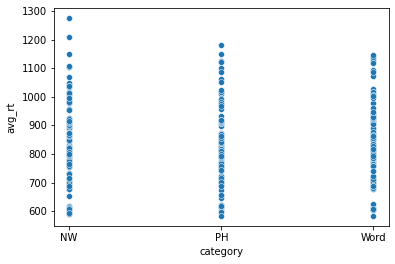

In [44]:
ax = sns.scatterplot(data = data, x = 'category', y = 'avg_rt')

Text(0, 0.5, 'RT')

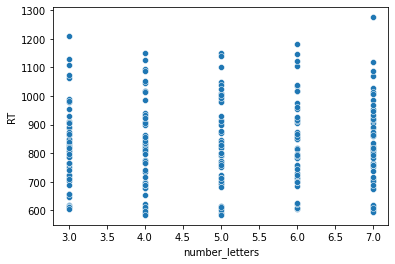

In [47]:
ax = sns.scatterplot(data = data, x = 'number_letters', y = 'avg_rt')
ax.set_ylabel('RT')

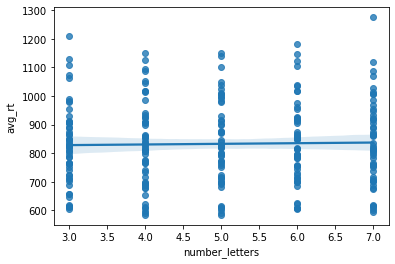

In [48]:
ax = sns.regplot(x = 'number_letters', y = 'avg_rt', data = data)

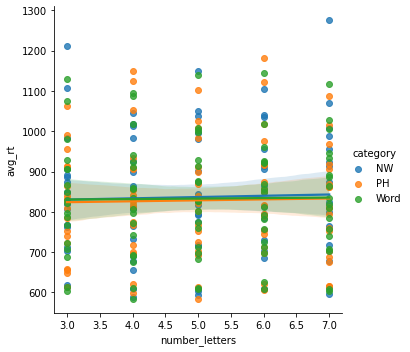

In [49]:
ax = sns.lmplot(x = 'number_letters', y = 'avg_rt', hue = 'category', data = data)

## Data as distributions

- what is a distribution?
- what are density (kde) plots)
- observed data as samples from a distribution
- data are generated by a process (relate to causal models, "error" in e.g. linear models)
- individual distributions, group sample distributions, population distributions (usually unknowable, but we can estimate)

<AxesSubplot:xlabel='avg_rt', ylabel='Density'>

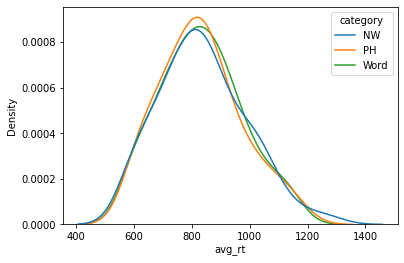

In [50]:
sns.kdeplot(x = 'avg_rt', hue = 'category', data = data)

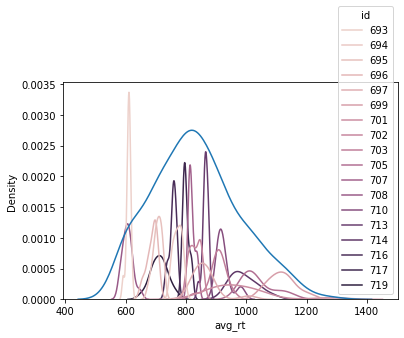

In [51]:
ax = sns.kdeplot(x = 'avg_rt', hue = 'id', data = data)
ax = sns.kdeplot(x = 'avg_rt', data = data)

## Distributions all the way down..

We can use e.g. the stripplot to see every data point from each individual. Here is participant number 705:

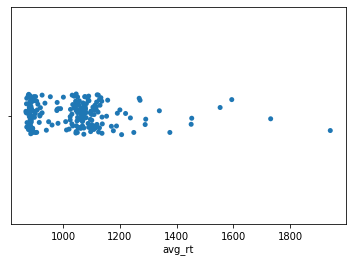

In [65]:
ax = sns.stripplot(x = 'avg_rt', hue = 'jatosStudyResultId', data = rawdata.loc[(rawdata['jatosStudyResultId'] == 705)])


## matplotlib

Practice a few matplotlib skills:

- subplots
- titles
- adjusting axis limits
- legends
- overlaying plots

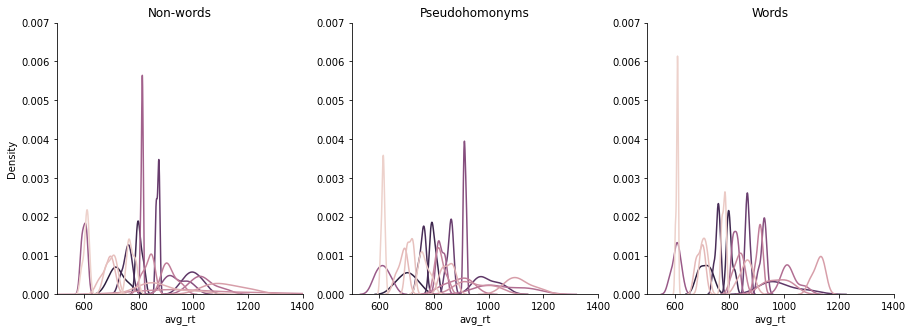

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.kdeplot(x = 'avg_rt', hue = 'id', 
                  data = data[(data['category'] == 'NW')], 
                  ax=axes[0])

ax2 = sns.kdeplot(x = 'avg_rt', hue = 'id', 
                  data = data[(data['category'] == 'PH')], 
                  ax=axes[1])

ax3 = sns.kdeplot(x = 'avg_rt', hue = 'id', 
                  data = data[(data['category'] == 'Word')], 
                  ax=axes[2])

ax2.set(ylabel = '')
ax3.set(ylabel = '')

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    ax.set_xlim(500, 1400)
    ax.set_ylim(0, 0.007)
    
titles = ['Non-words', 'Pseudohomonyms', 'Words']

for n, ax in enumerate(axes):
    ax.set_title(titles[n])

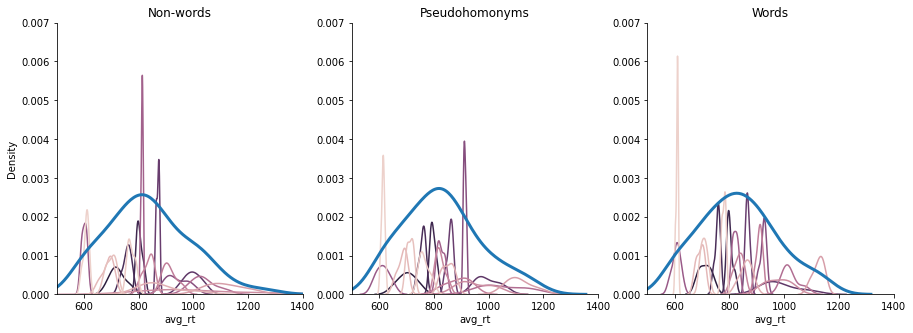

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.kdeplot(x = 'avg_rt', hue = 'id', 
                  data = data[(data['category'] == 'NW')], 
                  ax=axes[0])

ax1 = sns.kdeplot(x = 'avg_rt', data = data[(data['category'] == 'NW')], 
                  ax=axes[0], linewidth = 3)




ax2 = sns.kdeplot(x = 'avg_rt', hue = 'id', 
                  data = data[(data['category'] == 'PH')], 
                  ax=axes[1])

ax2 = sns.kdeplot(x = 'avg_rt', data = data[(data['category'] == 'PH')], 
                  ax=axes[1], linewidth = 3)


ax3 = sns.kdeplot(x = 'avg_rt', hue = 'id', 
                  data = data[(data['category'] == 'Word')], 
                  ax=axes[2])

ax3 = sns.kdeplot(x = 'avg_rt', data = data[(data['category'] == 'Word')], 
                  ax=axes[2], linewidth = 3)

                  
ax2.set(ylabel = '')
ax3.set(ylabel = '')

titles = ['Non-words', 'Pseudohomonyms', 'Words']

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    ax.set_xlim(500, 1400)
    ax.set_ylim(0, 0.007)


for n, ax in enumerate(axes):
    ax.set_title(titles[n])
    
